In [2]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
movies = pd.read_csv('IMDB-Movie-Data.csv')

In [4]:
movies.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [5]:
movies.isna().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

In [6]:
movies.dropna(how ='any', inplace=True)

In [7]:
movies.isna().sum()

Rank                  0
Title                 0
Genre                 0
Description           0
Director              0
Actors                0
Year                  0
Runtime (Minutes)     0
Rating                0
Votes                 0
Revenue (Millions)    0
Metascore             0
dtype: int64

# Answering some business questions

In [8]:
#which year has the best revenue
movies['Income'] = movies['Revenue (Millions)'].astype('float')

In [9]:
movies.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Income
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,333.13
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,126.46
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,138.12
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,270.32
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,325.02


In [10]:
movies.groupby('Year')['Income'].sum()

Year
2006     3577.48
2007     4095.26
2008     4681.22
2009     5208.39
2010     5989.65
2011     5341.09
2012     6826.39
2013     7399.11
2014     7945.33
2015     8799.09
2016    11002.09
Name: Income, dtype: float64

<AxesSubplot:xlabel='Year'>

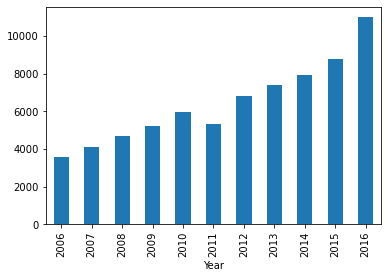

In [11]:
movies.groupby('Year')['Income'].sum().plot(kind = 'bar')

**Ridley Scott** has directed 8 movies on the list, followed by Michael Bay, **David Yates**, **Paul W.S. Anderson**, and **M. Night Shyamalan**, with 6 apiece.

<AxesSubplot:xlabel='Director'>

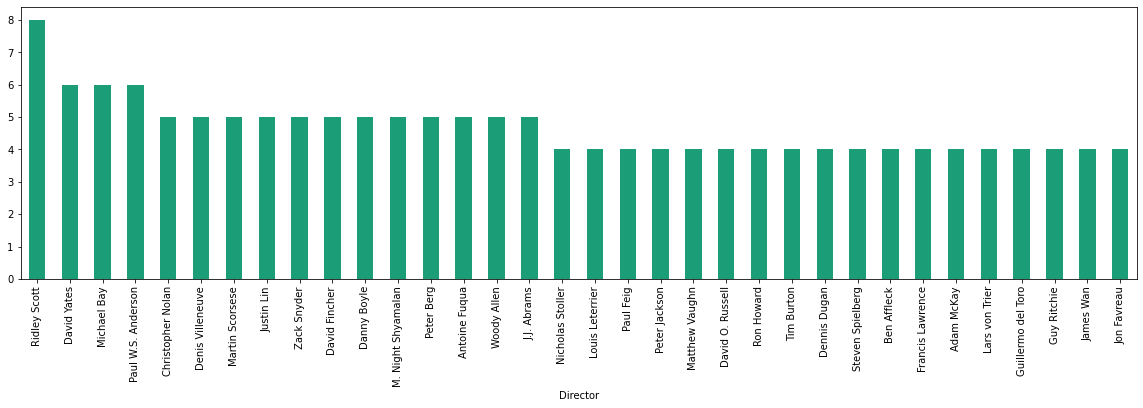

In [12]:
# who are the popular directors
directors = movies.groupby('Director')['Title'].count().sort_values(ascending=False)
plt.figure(figsize=(20,5))
directors[directors > 3].plot(kind='bar', colormap='Dark2')

In [13]:
#which movie had the best ratings
movies_ratings = movies.groupby('Title')['Rating'].sum().sort_values(ascending=False)


<AxesSubplot:xlabel='Title'>

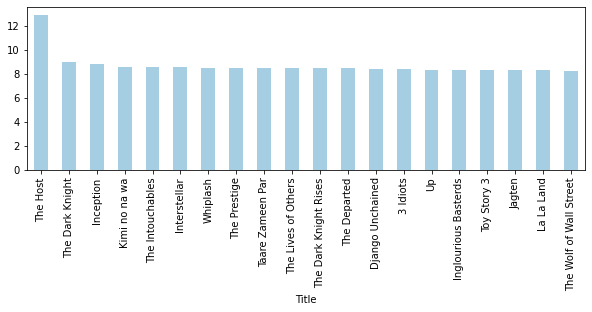

In [14]:
plt.figure(figsize=(10,3))
movies_ratings[:20].plot(kind='bar', colormap='Paired')

`The Host` was rated **12.9**, which is not possible as the ratings cap is **10.0**. That must have been a human error. 

It is also interesting to note that a good number of the most-watched movies made it to the highest-rated movies list.